Volatility Drawdown Return anlaysis 실험 (SPY 기준)

페키지 설치

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl

In [21]:
# Set Korean font
mpl.rcParams['font.family'] = 'AppleGothic'

# Optional: Avoid minus sign breaking
mpl.rcParams['axes.unicode_minus'] = False

Data load

In [12]:
## based on data/processed/SPY_2018-01-01_2024-12-31_log_return.csv
SPY_df = pd.read_csv("/Users/daeyeop/Desktop/ETF-risk-forcasting/data/processed/SPY_2018-01-01_2024-12-31_log_return.csv", parse_dates=["Date"])
SPY_df.set_index("Date", inplace=True)

수익률 계산은 어떻게?

In [14]:
# 누적 수익률 계산 (그냥 수익률)
SPY_df["cum_return"] = (1 + SPY_df["Return"]).cumprod()
# 누적 수익률 계산 (로그 수익률)
SPY_df["cum_log_return"] = np.exp(SPY_df["Log_Return"].cumsum())


변동성 계산 (20일 기준)

In [15]:
# 변동성 계산 (20일 기준)
SPY_df["volatility"] = SPY_df["Return"].rolling(window=20).std()
# 변동성 계산 (로그 수익률)
SPY_df["volatility_log_return"] = SPY_df["Log_Return"].rolling(window=20).std()



최대 낙폭 계산

In [16]:
# 최대 낙폭 계산
cum_max = SPY_df["cum_return"].cummax()
SPY_df["drawdown"] = (SPY_df["cum_return"] - cum_max) / cum_max
# 최대 낙폭 계산 (로그 수익률)
cum_max_log_return = SPY_df["cum_log_return"].cummax()
SPY_df["drawdown_log_return"] = (SPY_df["cum_log_return"] - cum_max_log_return) / cum_max_log_return


시각화

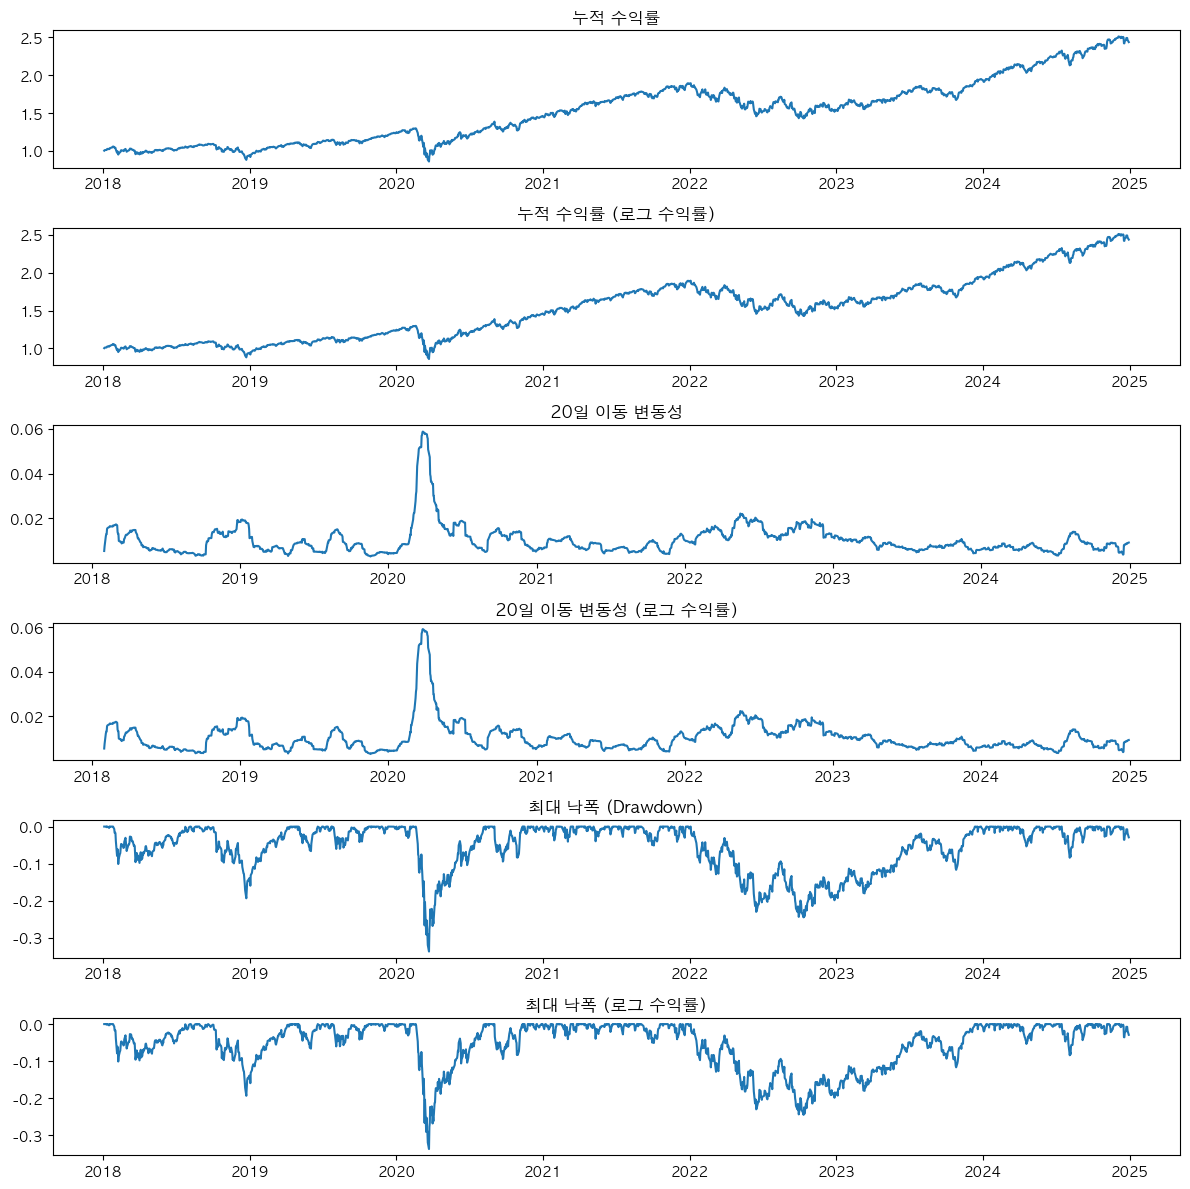

In [22]:
plt.figure(figsize=(12, 12))

# 누적 수익률
plt.subplot(6, 1, 1)
plt.plot(SPY_df["cum_return"])
plt.title("누적 수익률")

# 누적 수익률 (로그 수익률)
plt.subplot(6, 1, 2)
plt.plot(SPY_df["cum_log_return"])
plt.title("누적 수익률 (로그 수익률)")

# 변동성 수익률
plt.subplot(6, 1, 3)
plt.plot(SPY_df["volatility"])
plt.title("20일 이동 변동성")

# 변동성 수익률 (로그 수익률)
plt.subplot(6, 1, 4)
plt.plot(SPY_df["volatility_log_return"])
plt.title("20일 이동 변동성 (로그 수익률)")

# 최대 낙폭
plt.subplot(6, 1, 5)
plt.plot(SPY_df["drawdown"])
plt.title("최대 낙폭 (Drawdown)")

# 최대 낙폭 (로그 수익률)
plt.subplot(6, 1, 6)
plt.plot(SPY_df["drawdown_log_return"])
plt.title("최대 낙폭 (로그 수익률)")

plt.tight_layout()
plt.show()
